In [40]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Thiết lập hiển thị pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Đã import các thư viện thành công!")


✅ Đã import các thư viện thành công!


In [41]:
# Load dữ liệu
print("=" * 60)
print("ĐANG LOAD DỮ LIỆU...")
print("=" * 60)

# Load movies data
movies_df = pd.read_csv('../data/movies.csv')
print(f"✅ Movies: {len(movies_df)} phim")

# Load ratings data
ratings_df = pd.read_csv('../data/ratings.csv')
print(f"✅ Ratings: {len(ratings_df)} đánh giá")

# Merge để có thông tin đầy đủ
df = ratings_df.merge(movies_df, on='movieId', how='left')
print(f"✅ Merged data: {len(df)} dòng")

# Hiển thị thông tin cơ bản
print("\n" + "=" * 60)
print("THÔNG TIN DỮ LIỆU")
print("=" * 60)
print(f"Số lượng users: {df['userId'].nunique()}")
print(f"Số lượng movies: {df['movieId'].nunique()}")
print(f"Rating trung bình: {df['rating'].mean():.2f}")
print(f"Rating min: {df['rating'].min()}")
print(f"Rating max: {df['rating'].max()}")
print("\n" + df.head().to_string())


ĐANG LOAD DỮ LIỆU...
✅ Movies: 10329 phim
✅ Ratings: 105339 đánh giá
✅ Merged data: 105339 dòng

THÔNG TIN DỮ LIỆU
Số lượng users: 668
Số lượng movies: 10325
Rating trung bình: 3.52
Rating min: 0.5
Rating max: 5.0

   userId  movieId  rating   timestamp                                      title                   genres
0       1       16     4.0  1217897793                              Casino (1995)              Crime|Drama
1       1       24     1.5  1217895807                              Powder (1995)             Drama|Sci-Fi
2       1       32     4.0  1217896246  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  Mystery|Sci-Fi|Thriller
3       1       47     4.0  1217896556                Seven (a.k.a. Se7en) (1995)         Mystery|Thriller
4       1       50     4.0  1217896523                 Usual Suspects, The (1995)   Crime|Mystery|Thriller


# 📊 PHÂN TÍCH & TRỰC QUAN HÓA DỮ LIỆU

## 1. Phân bố Rating (Histogram)


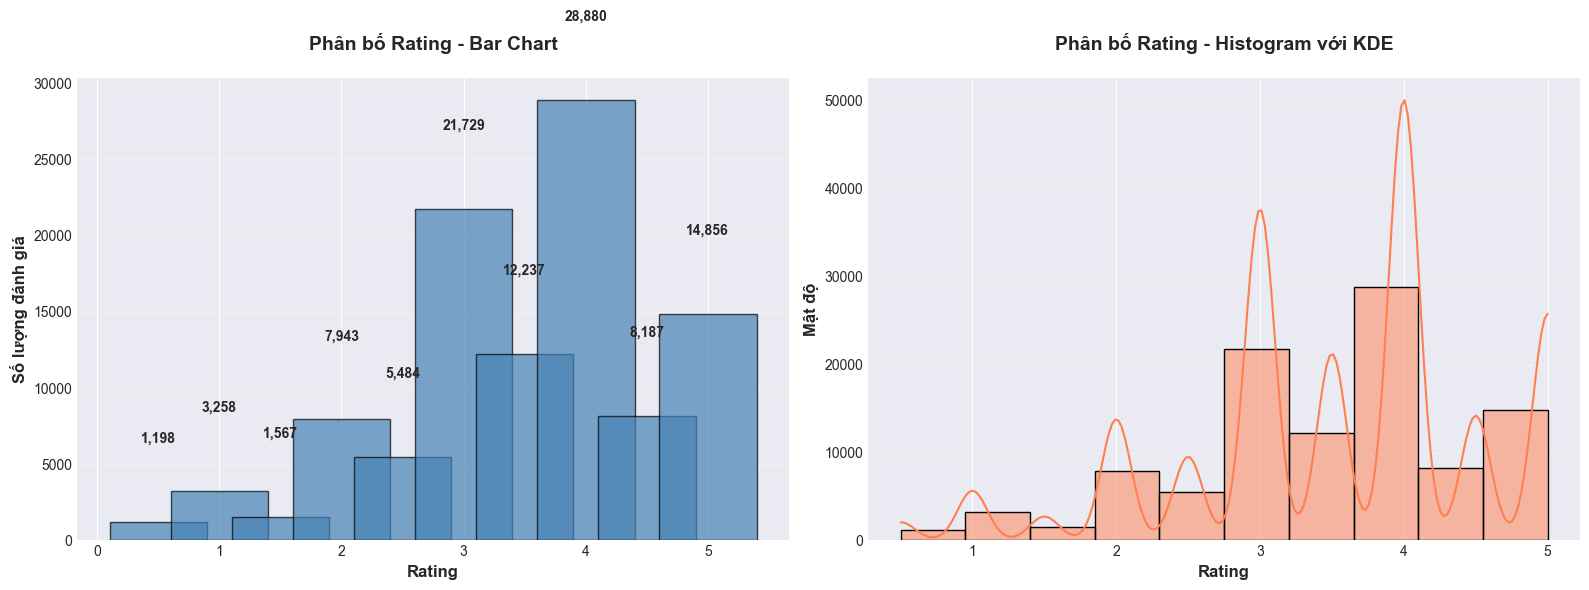


THỐNG KÊ RATING
count    105339.000000
mean          3.516850
std           1.044872
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Tỷ lệ % theo rating:
  Rating 0.5: 1,198 (1.14%)
  Rating 1.0: 3,258 (3.09%)
  Rating 1.5: 1,567 (1.49%)
  Rating 2.0: 7,943 (7.54%)
  Rating 2.5: 5,484 (5.21%)
  Rating 3.0: 21,729 (20.63%)
  Rating 3.5: 12,237 (11.62%)
  Rating 4.0: 28,880 (27.42%)
  Rating 4.5: 8,187 (7.77%)
  Rating 5.0: 14,856 (14.10%)


In [42]:
# 1. PHÂN BỐ RATING - Histogram
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram với matplotlib
rating_counts = df['rating'].value_counts().sort_index()
axes[0].bar(rating_counts.index, rating_counts.values, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Rating', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Số lượng đánh giá', fontsize=12, fontweight='bold')
axes[0].set_title('Phân bố Rating - Bar Chart', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(rating_counts.values):
    axes[0].text(rating_counts.index[i], v + 5000, f'{v:,}', 
                ha='center', va='bottom', fontweight='bold')

# Histogram với seaborn
sns.histplot(data=df, x='rating', bins=10, kde=True, ax=axes[1], color='coral')
axes[1].set_xlabel('Rating', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Mật độ', fontsize=12, fontweight='bold')
axes[1].set_title('Phân bố Rating - Histogram với KDE', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Thống kê chi tiết
print("\n" + "=" * 60)
print("THỐNG KÊ RATING")
print("=" * 60)
print(df['rating'].describe())
print(f"\nTỷ lệ % theo rating:")
for rating in sorted(df['rating'].unique()):
    count = len(df[df['rating'] == rating])
    pct = (count / len(df)) * 100
    print(f"  Rating {rating}: {count:,} ({pct:.2f}%)")


## 2. Top Items - Phim được đánh giá nhiều nhất


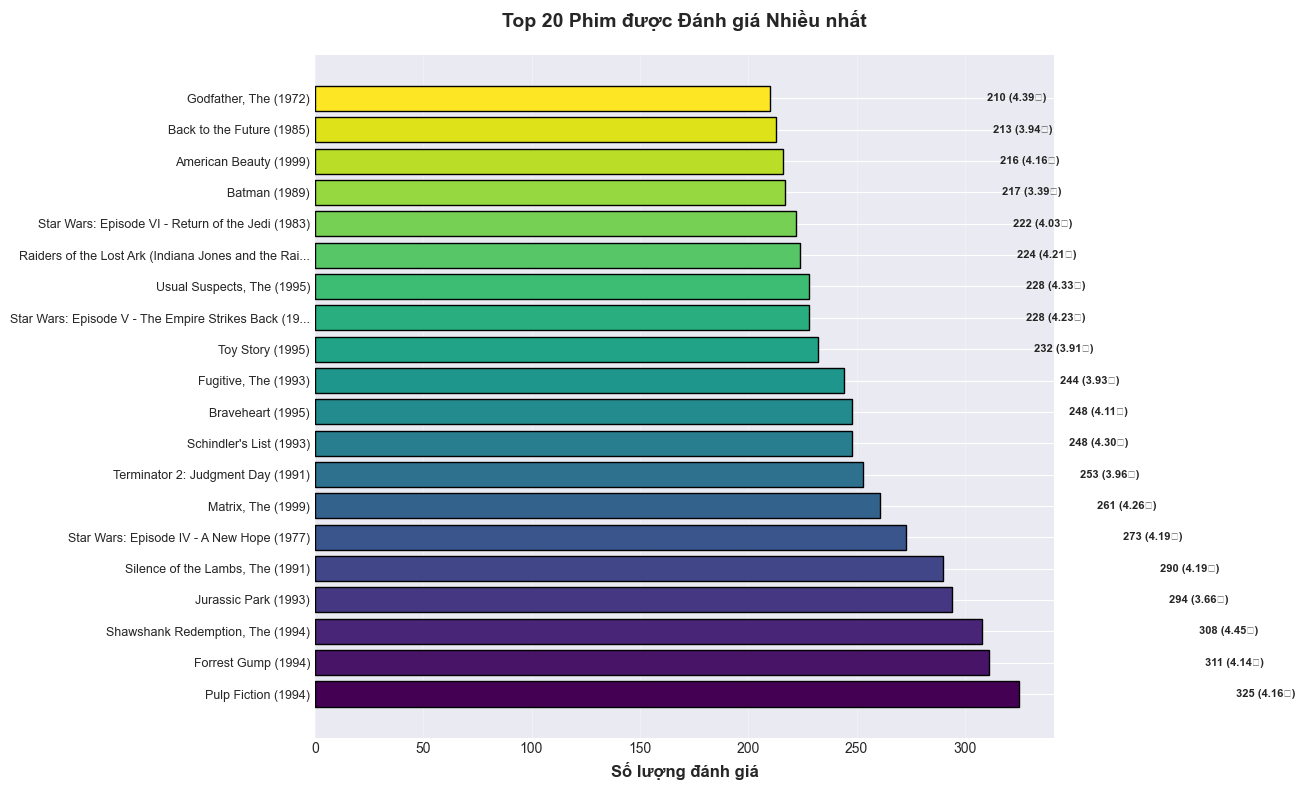


TOP 10 PHIM ĐƯỢC ĐÁNH GIÁ NHIỀU NHẤT
 movieId                                     title  num_ratings  avg_rating
     296                       Pulp Fiction (1994)          325    4.160000
     356                       Forrest Gump (1994)          311    4.138264
     318          Shawshank Redemption, The (1994)          308    4.454545
     480                      Jurassic Park (1993)          294    3.659864
     593          Silence of the Lambs, The (1991)          290    4.194828
     260 Star Wars: Episode IV - A New Hope (1977)          273    4.188645
    2571                        Matrix, The (1999)          261    4.264368
     589         Terminator 2: Judgment Day (1991)          253    3.960474
     527                   Schindler's List (1993)          248    4.296371
     110                         Braveheart (1995)          248    4.108871


In [43]:
# 2. TOP ITEMS - Phim được đánh giá nhiều nhất
top_movies = df.groupby(['movieId', 'title']).agg({
    'rating': ['count', 'mean']
}).reset_index()
top_movies.columns = ['movieId', 'title', 'num_ratings', 'avg_rating']
top_movies = top_movies.sort_values('num_ratings', ascending=False).head(20)

# Bar chart với matplotlib
fig, ax = plt.subplots(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_movies)))
bars = ax.barh(range(len(top_movies)), top_movies['num_ratings'], color=colors, edgecolor='black')
ax.set_yticks(range(len(top_movies)))
ax.set_yticklabels([title[:50] + '...' if len(title) > 50 else title for title in top_movies['title']], fontsize=9)
ax.set_xlabel('Số lượng đánh giá', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Phim được Đánh giá Nhiều nhất', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Thêm số liệu trên mỗi bar
for i, (idx, row) in enumerate(top_movies.iterrows()):
    ax.text(row['num_ratings'] + 100, i, f"{int(row['num_ratings']):,} ({row['avg_rating']:.2f}⭐)", 
           va='center', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("TOP 10 PHIM ĐƯỢC ĐÁNH GIÁ NHIỀU NHẤT")
print("=" * 60)
print(top_movies.head(10).to_string(index=False))


## 3. Tần suất Nhóm Sản phẩm (Genres) - Bar Chart & Treemap


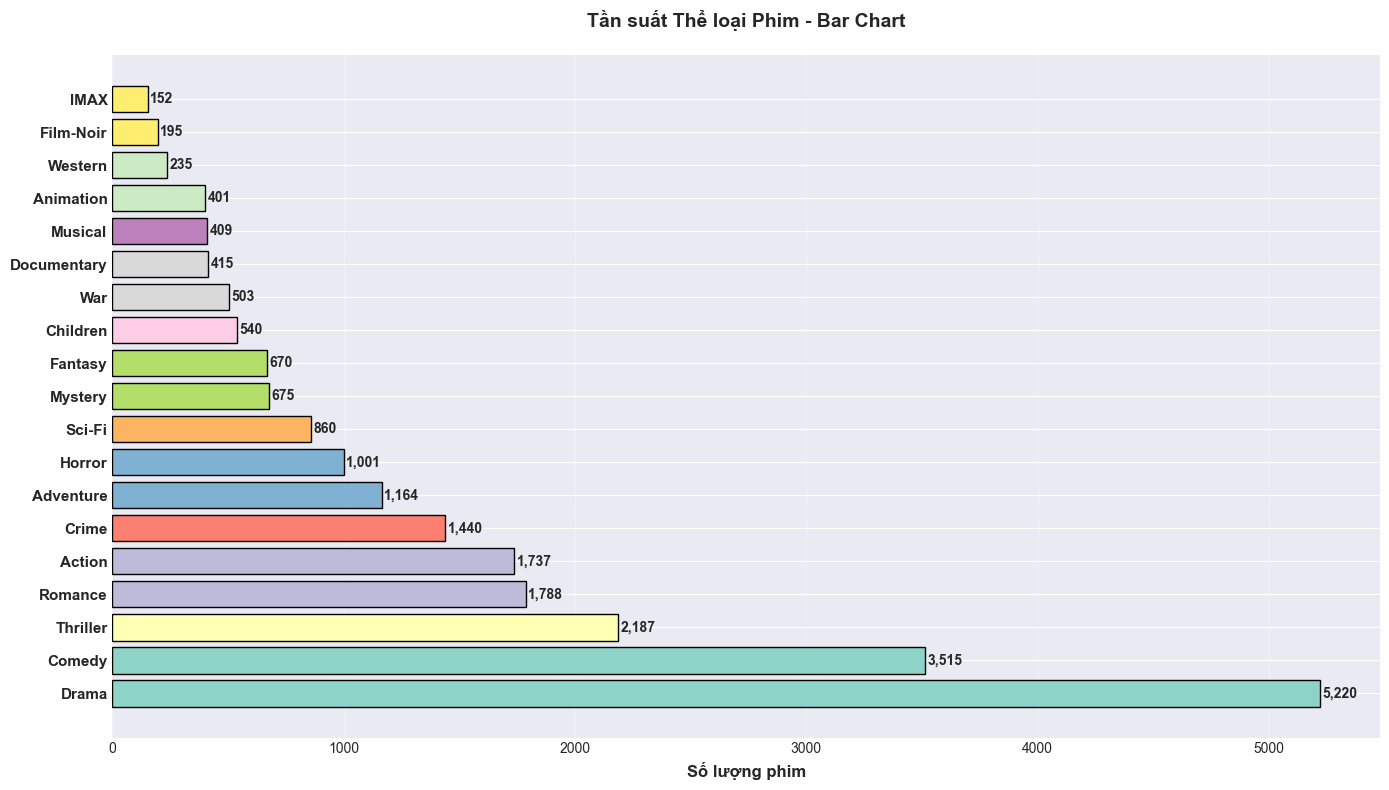


THỐNG KÊ THỂ LOẠI
Drama          5220
Comedy         3515
Thriller       2187
Romance        1788
Action         1737
Crime          1440
Adventure      1164
Horror         1001
Sci-Fi          860
Mystery         675
Fantasy         670
Children        540
War             503
Documentary     415
Musical         409
Animation       401
Western         235
Film-Noir       195
IMAX            152


In [44]:
# 3. TẦN SUẤT THỂ LOẠI (GENRES)
# Tách các genres (mỗi phim có thể có nhiều genres)
genres_list = []
for genres in movies_df['genres'].dropna():
    if genres != '(no genres listed)':
        genres_list.extend(genres.split('|'))

genre_counts = pd.Series(genres_list).value_counts()

# Bar Chart
fig, ax = plt.subplots(figsize=(14, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(genre_counts)))
bars = ax.barh(range(len(genre_counts)), genre_counts.values, color=colors, edgecolor='black')
ax.set_yticks(range(len(genre_counts)))
ax.set_yticklabels(genre_counts.index, fontsize=11, fontweight='bold')
ax.set_xlabel('Số lượng phim', fontsize=12, fontweight='bold')
ax.set_title('Tần suất Thể loại Phim - Bar Chart', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Thêm số liệu
for i, v in enumerate(genre_counts.values):
    ax.text(v + 10, i, f'{v:,}', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("THỐNG KÊ THỂ LOẠI")
print("=" * 60)
print(genre_counts.to_string())


In [45]:
# Treemap với Plotly
fig = px.treemap(
    names=genre_counts.index,
    parents=[''] * len(genre_counts),
    values=genre_counts.values,
    title='Tần suất Thể loại Phim - Treemap',
    color=genre_counts.values,
    color_continuous_scale='Viridis',
    labels={'value': 'Số lượng phim', 'names': 'Thể loại'}
)
fig.update_layout(
    font_size=12,
    title_font_size=16,
    title_x=0.5
)
fig.update_traces(
    textinfo='label+value',
    textfont_size=12,
    hovertemplate='<b>%{label}</b><br>Số lượng: %{value}<extra></extra>'
)
fig.show()


## 4. Heatmap - Ma trận Rating theo User và Movie


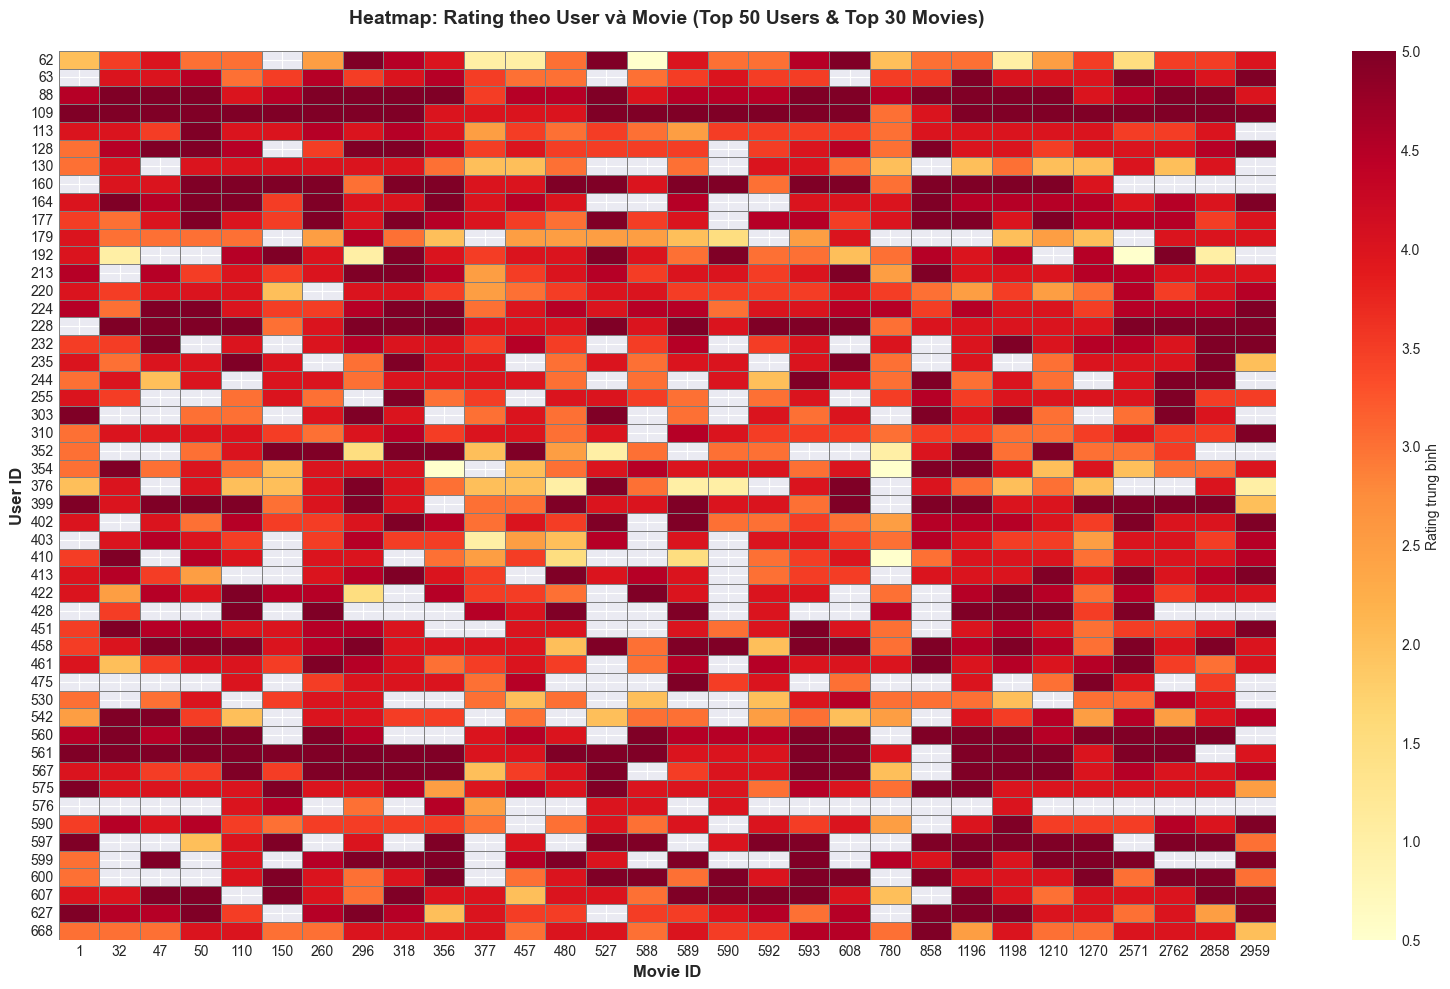


Heatmap hiển thị 50 users và 30 movies


In [46]:
# 4. HEATMAP - Ma trận rating (sample để hiển thị)
# Lấy top users và top movies để tạo heatmap
top_users = df['userId'].value_counts().head(50).index
top_movies_sample = df['movieId'].value_counts().head(30).index

# Tạo pivot table
heatmap_data = df[
    (df['userId'].isin(top_users)) & 
    (df['movieId'].isin(top_movies_sample))
].pivot_table(
    index='userId', 
    columns='movieId', 
    values='rating',
    aggfunc='mean'
)

# Heatmap với seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data, 
    cmap='YlOrRd', 
    annot=False, 
    fmt='.1f',
    cbar_kws={'label': 'Rating trung bình'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Heatmap: Rating theo User và Movie (Top 50 Users & Top 30 Movies)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Movie ID', fontsize=12, fontweight='bold')
plt.ylabel('User ID', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nHeatmap hiển thị {len(top_users)} users và {len(top_movies_sample)} movies")


## 5. WordCloud - Từ khóa từ Tiêu đề Phim


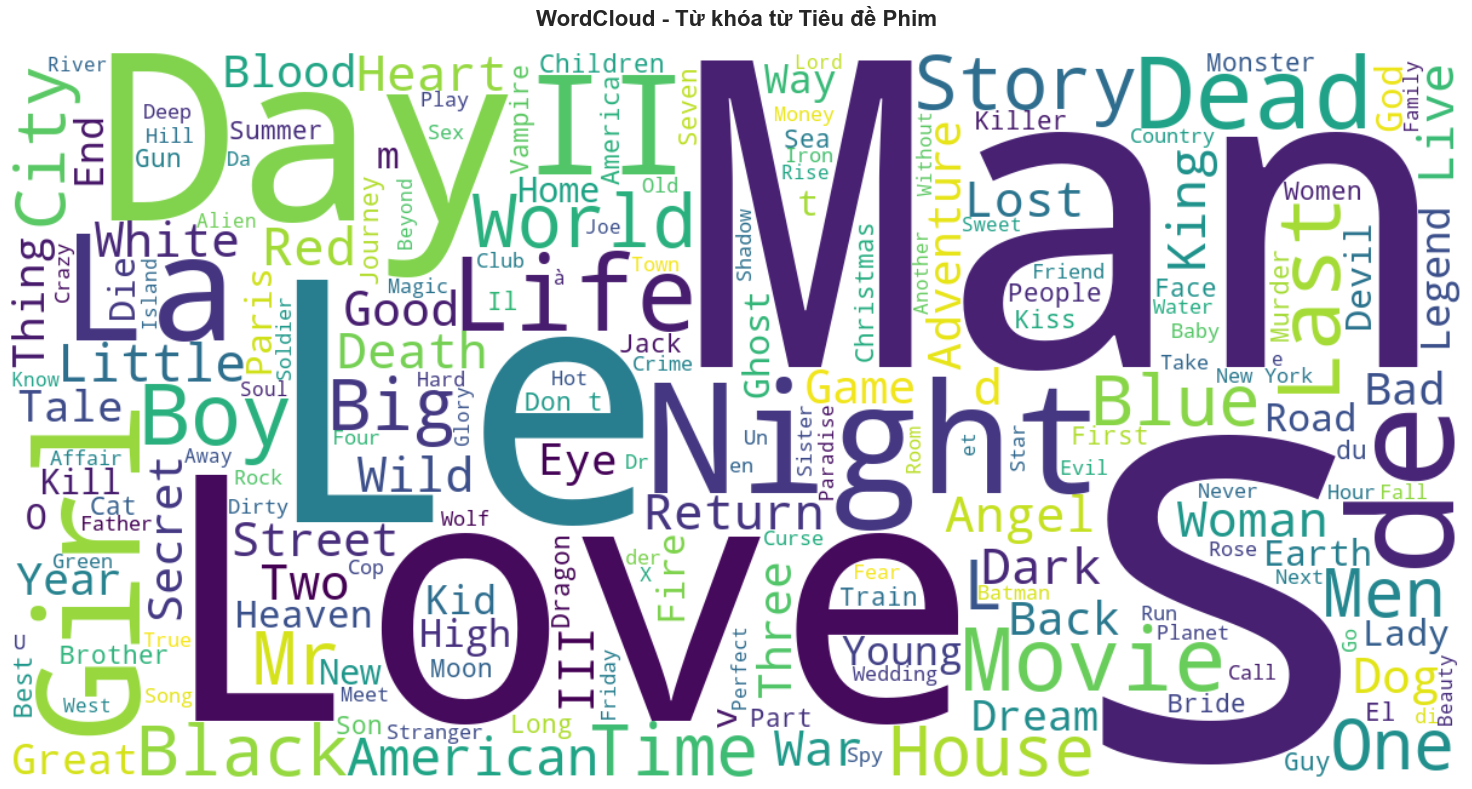

In [47]:
# 5. WORDCLOUD - Từ tiêu đề phim
# Lấy tất cả tiêu đề phim
all_titles = ' '.join(movies_df['title'].dropna().astype(str))

# Loại bỏ năm và ký tự đặc biệt
import re
all_titles = re.sub(r'\(\d{4}\)', '', all_titles)  # Loại bỏ năm
all_titles = re.sub(r'[^\w\s]', ' ', all_titles)  # Loại bỏ ký tự đặc biệt

# Tạo WordCloud
wordcloud = WordCloud(
    width=1200, 
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=200,
    relative_scaling=0.5,
    random_state=42
).generate(all_titles)

# Hiển thị - Fix: Convert WordCloud to image array properly
plt.figure(figsize=(16, 8))
# Convert WordCloud to PIL Image, then to numpy array
wordcloud_image = wordcloud.to_image()
plt.imshow(np.array(wordcloud_image), interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Từ khóa từ Tiêu đề Phim', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## 6. Plotly Visualizations - Biểu đồ tương tác


In [48]:
# 6. PLOTLY - Rating theo thời gian (Line Chart)
# Chuyển timestamp thành datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Tính rating trung bình theo tháng
monthly_ratings = df.groupby(['year', 'month']).agg({
    'rating': 'mean',
    'userId': 'count'
}).reset_index()
monthly_ratings['date'] = pd.to_datetime(monthly_ratings[['year', 'month']].assign(day=1))
monthly_ratings.columns = ['year', 'month', 'avg_rating', 'num_ratings', 'date']

# Line chart với Plotly
fig = go.Figure()

# Rating trung bình
fig.add_trace(go.Scatter(
    x=monthly_ratings['date'],
    y=monthly_ratings['avg_rating'],
    mode='lines+markers',
    name='Rating trung bình',
    line=dict(color='steelblue', width=2),
    marker=dict(size=6),
    hovertemplate='<b>Tháng:</b> %{x}<br><b>Rating:</b> %{y:.2f}<extra></extra>'
))

fig.update_layout(
    title='Rating Trung bình theo Thời gian - Line Chart',
    xaxis_title='Thời gian',
    yaxis_title='Rating trung bình',
    hovermode='x unified',
    template='plotly_white',
    height=500,
    title_x=0.5
)
fig.show()


In [49]:
# Plotly - Số lượng đánh giá theo thời gian
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_ratings['date'],
    y=monthly_ratings['num_ratings'],
    mode='lines+markers',
    name='Số lượng đánh giá',
    fill='tozeroy',
    line=dict(color='coral', width=2),
    marker=dict(size=6),
    hovertemplate='<b>Tháng:</b> %{x}<br><b>Số lượng:</b> %{y:,}<extra></extra>'
))

fig.update_layout(
    title='Số lượng Đánh giá theo Thời gian - Line Chart',
    xaxis_title='Thời gian',
    yaxis_title='Số lượng đánh giá',
    hovermode='x unified',
    template='plotly_white',
    height=500,
    title_x=0.5
)
fig.show()


In [50]:
# Plotly - Top Movies với Rating trung bình và số lượng đánh giá (Scatter)
top_movies_plotly = df.groupby(['movieId', 'title']).agg({
    'rating': ['mean', 'count']
}).reset_index()
top_movies_plotly.columns = ['movieId', 'title', 'avg_rating', 'num_ratings']
top_movies_plotly = top_movies_plotly[top_movies_plotly['num_ratings'] >= 100]  # Ít nhất 100 đánh giá

fig = px.scatter(
    top_movies_plotly,
    x='num_ratings',
    y='avg_rating',
    size='num_ratings',
    color='avg_rating',
    hover_data=['title'],
    color_continuous_scale='Viridis',
    title='Mối quan hệ giữa Số lượng Đánh giá và Rating Trung bình',
    labels={
        'num_ratings': 'Số lượng đánh giá',
        'avg_rating': 'Rating trung bình',
        'title': 'Tên phim'
    },
    size_max=30
)

fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>Số lượng: %{x:,}<br>Rating: %{y:.2f}<extra></extra>',
    hovertext=top_movies_plotly['title']
)
fig.update_layout(
    height=600,
    title_x=0.5,
    template='plotly_white'
)
fig.show()


In [51]:
# Plotly - Rating theo Genre (Box Plot)
# Tạo dữ liệu genres cho mỗi rating
genre_ratings = []
for _, row in df.iterrows():
    if pd.notna(row['genres']) and row['genres'] != '(no genres listed)':
        genres = row['genres'].split('|')
        for genre in genres:
            genre_ratings.append({'genre': genre, 'rating': row['rating']})

genre_ratings_df = pd.DataFrame(genre_ratings)
top_genres = genre_ratings_df['genre'].value_counts().head(10).index
genre_ratings_top = genre_ratings_df[genre_ratings_df['genre'].isin(top_genres)]

fig = px.box(
    genre_ratings_top,
    x='genre',
    y='rating',
    title='Phân bố Rating theo Thể loại (Top 10)',
    labels={'genre': 'Thể loại', 'rating': 'Rating'},
    color='genre',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_layout(
    height=600,
    title_x=0.5,
    template='plotly_white',
    xaxis_tickangle=-45
)
fig.show()


## 7. Area Chart - Biểu đồ vùng


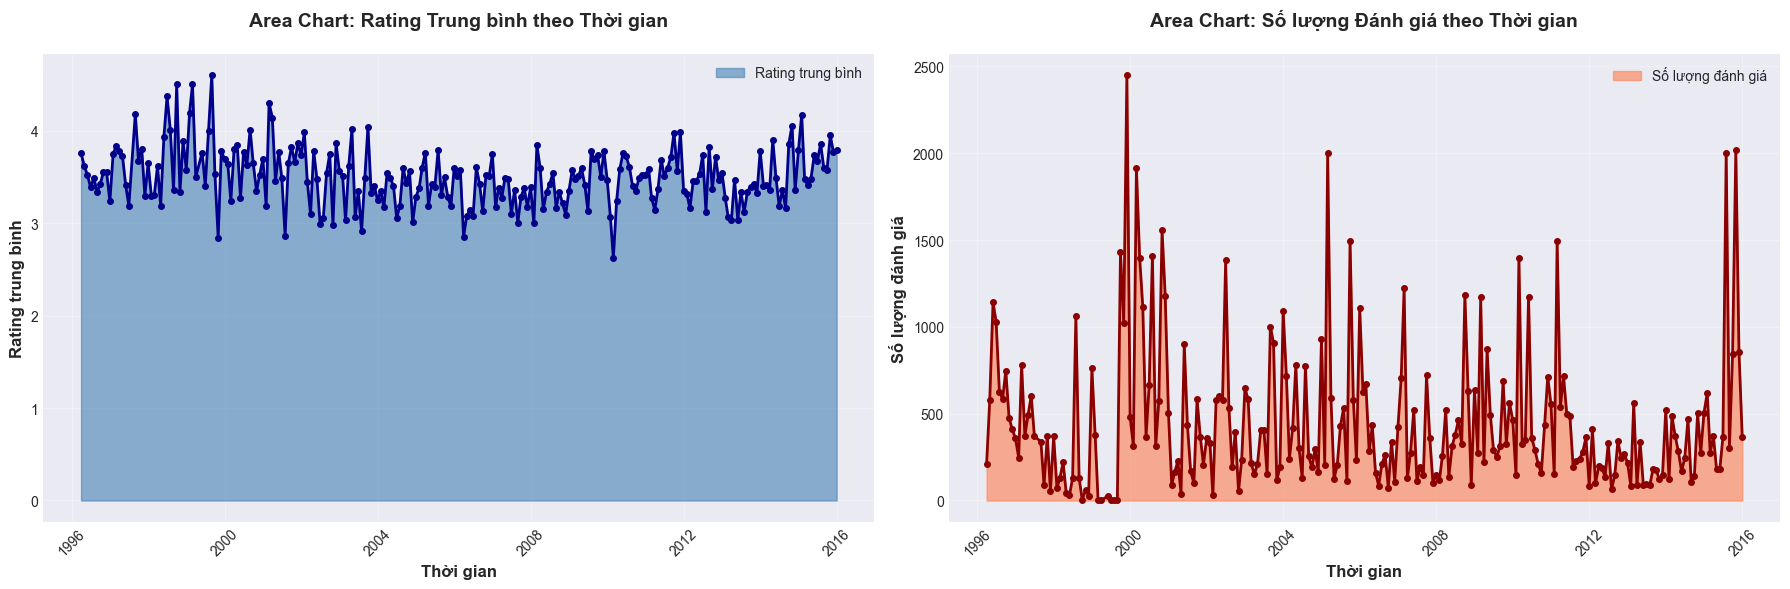

In [56]:
# 7. AREA CHART - Biểu đồ vùng
# Area chart với matplotlib - Rating trung bình theo thời gian
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Area chart 1: Rating trung bình theo tháng
axes[0].fill_between(
    monthly_ratings['date'], 
    monthly_ratings['avg_rating'],
    alpha=0.6,
    color='steelblue',
    label='Rating trung bình'
)
axes[0].plot(
    monthly_ratings['date'], 
    monthly_ratings['avg_rating'],
    color='darkblue',
    linewidth=2,
    marker='o',
    markersize=4
)
axes[0].set_xlabel('Thời gian', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Rating trung bình', fontsize=12, fontweight='bold')
axes[0].set_title('Area Chart: Rating Trung bình theo Thời gian', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10)
axes[0].tick_params(axis='x', rotation=45)

# Area chart 2: Số lượng đánh giá theo tháng
axes[1].fill_between(
    monthly_ratings['date'], 
    monthly_ratings['num_ratings'],
    alpha=0.6,
    color='coral',
    label='Số lượng đánh giá'
)
axes[1].plot(
    monthly_ratings['date'], 
    monthly_ratings['num_ratings'],
    color='darkred',
    linewidth=2,
    marker='o',
    markersize=4
)
axes[1].set_xlabel('Thời gian', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Số lượng đánh giá', fontsize=12, fontweight='bold')
axes[1].set_title('Area Chart: Số lượng Đánh giá theo Thời gian', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



## 8. Violin Plot - Phân bố Rating


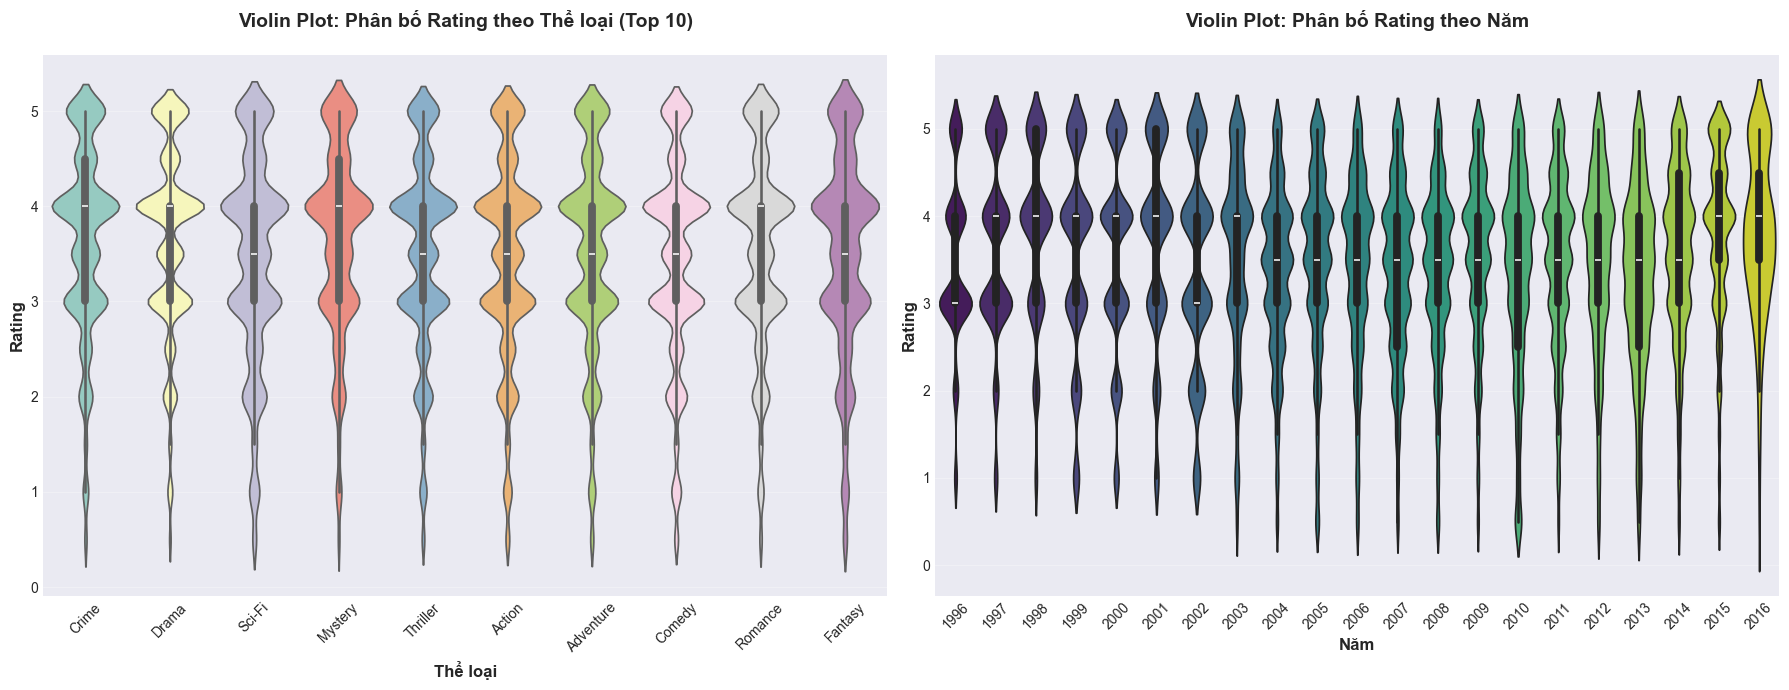

In [57]:
# 8. VIOLIN PLOT - Phân bố Rating
# Violin plot với seaborn - Rating theo thể loại
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Violin plot 1: Rating theo Top 10 Genres
top_10_genres = genre_ratings_df['genre'].value_counts().head(10).index
genre_ratings_top10 = genre_ratings_df[genre_ratings_df['genre'].isin(top_10_genres)]

sns.violinplot(
    data=genre_ratings_top10,
    x='genre',
    y='rating',
    ax=axes[0],
    palette='Set3',
    inner='box'
)
axes[0].set_xlabel('Thể loại', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Rating', fontsize=12, fontweight='bold')
axes[0].set_title('Violin Plot: Phân bố Rating theo Thể loại (Top 10)', fontsize=14, fontweight='bold', pad=20)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Violin plot 2: Rating theo năm
df['year'] = df['datetime'].dt.year
year_ratings = df[df['year'].between(1996, 2016)]  # Lọc năm có dữ liệu

sns.violinplot(
    data=year_ratings,
    x='year',
    y='rating',
    ax=axes[1],
    palette='viridis',
    inner='box'
)
axes[1].set_xlabel('Năm', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Rating', fontsize=12, fontweight='bold')
axes[1].set_title('Violin Plot: Phân bố Rating theo Năm', fontsize=14, fontweight='bold', pad=20)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()




## 9. Tổng hợp Thống kê


In [54]:
# 9. TỔNG HỢP THỐNG KÊ
print("=" * 80)
print("TỔNG HỢP THỐNG KÊ DỮ LIỆU")
print("=" * 80)

print(f"\n📊 TỔNG QUAN:")
print(f"  - Tổng số phim: {movies_df['movieId'].nunique():,}")
print(f"  - Tổng số users: {df['userId'].nunique():,}")
print(f"  - Tổng số đánh giá: {len(df):,}")
print(f"  - Rating trung bình: {df['rating'].mean():.2f}")
print(f"  - Độ lệch chuẩn: {df['rating'].std():.2f}")

print(f"\n⭐ RATING:")
print(f"  - Rating cao nhất: {df['rating'].max()}")
print(f"  - Rating thấp nhất: {df['rating'].min()}")
print(f"  - Median: {df['rating'].median():.2f}")

print(f"\n🎬 THỂ LOẠI:")
print(f"  - Số thể loại duy nhất: {len(genre_counts)}")
print(f"  - Thể loại phổ biến nhất: {genre_counts.index[0]} ({genre_counts.iloc[0]} phim)")

print(f"\n📈 TOP 5 PHIM ĐƯỢC ĐÁNH GIÁ NHIỀU NHẤT:")
for i, (idx, row) in enumerate(top_movies.head(5).iterrows(), 1):
    print(f"  {i}. {row['title'][:60]}")
    print(f"     - Số đánh giá: {int(row['num_ratings']):,}")
    print(f"     - Rating trung bình: {row['avg_rating']:.2f}")

print(f"\n📅 THỜI GIAN:")
print(f"  - Năm đầu tiên: {df['year'].min()}")
print(f"  - Năm cuối cùng: {df['year'].max()}")
print(f"  - Tháng có nhiều đánh giá nhất: {monthly_ratings.loc[monthly_ratings['num_ratings'].idxmax(), 'date'].strftime('%Y-%m')} ({monthly_ratings['num_ratings'].max():,} đánh giá)")

print("\n" + "=" * 80)
print("✅ HOÀN THÀNH PHÂN TÍCH & TRỰC QUAN HÓA!")
print("=" * 80)


TỔNG HỢP THỐNG KÊ DỮ LIỆU

📊 TỔNG QUAN:
  - Tổng số phim: 10,329
  - Tổng số users: 668
  - Tổng số đánh giá: 105,339
  - Rating trung bình: 3.52
  - Độ lệch chuẩn: 1.04

⭐ RATING:
  - Rating cao nhất: 5.0
  - Rating thấp nhất: 0.5
  - Median: 3.50

🎬 THỂ LOẠI:
  - Số thể loại duy nhất: 19
  - Thể loại phổ biến nhất: Drama (5220 phim)

📈 TOP 5 PHIM ĐƯỢC ĐÁNH GIÁ NHIỀU NHẤT:
  1. Pulp Fiction (1994)
     - Số đánh giá: 325
     - Rating trung bình: 4.16
  2. Forrest Gump (1994)
     - Số đánh giá: 311
     - Rating trung bình: 4.14
  3. Shawshank Redemption, The (1994)
     - Số đánh giá: 308
     - Rating trung bình: 4.45
  4. Jurassic Park (1993)
     - Số đánh giá: 294
     - Rating trung bình: 3.66
  5. Silence of the Lambs, The (1991)
     - Số đánh giá: 290
     - Rating trung bình: 4.19

📅 THỜI GIAN:
  - Năm đầu tiên: 1996
  - Năm cuối cùng: 2016
  - Tháng có nhiều đánh giá nhất: 1999-12 (2,450 đánh giá)

✅ HOÀN THÀNH PHÂN TÍCH & TRỰC QUAN HÓA!
